In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
insurance = pd.read_csv('Course Materials/Data/insurance.csv')

In [4]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Axes: xlabel='charges', ylabel='Count'>

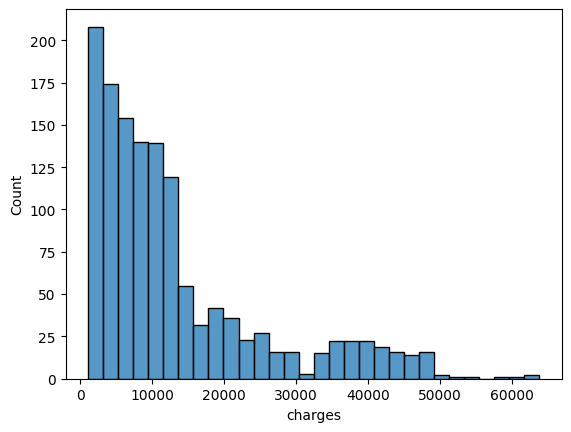

In [7]:
sns.histplot(insurance['charges'])

<Axes: xlabel='charges'>

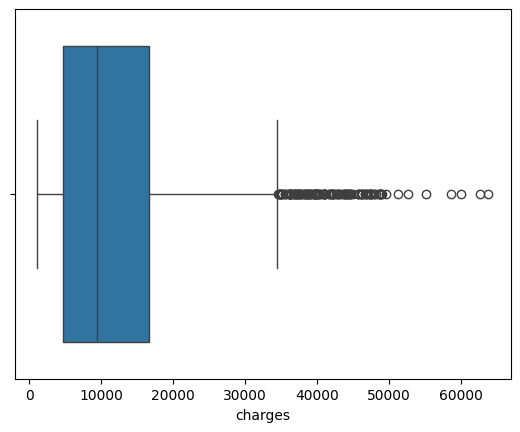

In [8]:
sns.boxplot(x=insurance['charges'])

<Axes: xlabel='charges'>

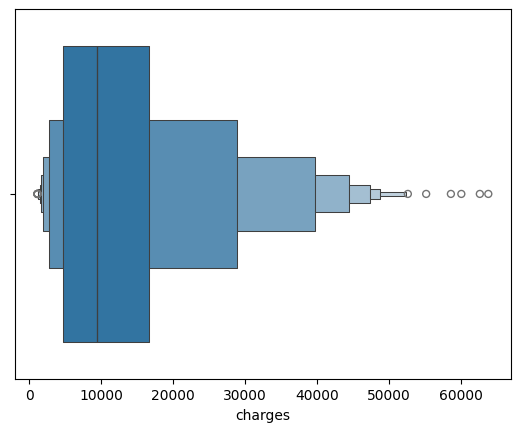

In [9]:
sns.boxenplot(x=insurance['charges'])

<Axes: xlabel='age', ylabel='Count'>

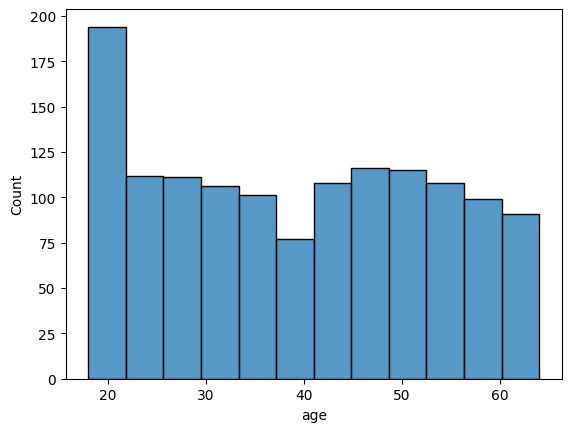

In [10]:
sns.histplot(x=insurance['age'])

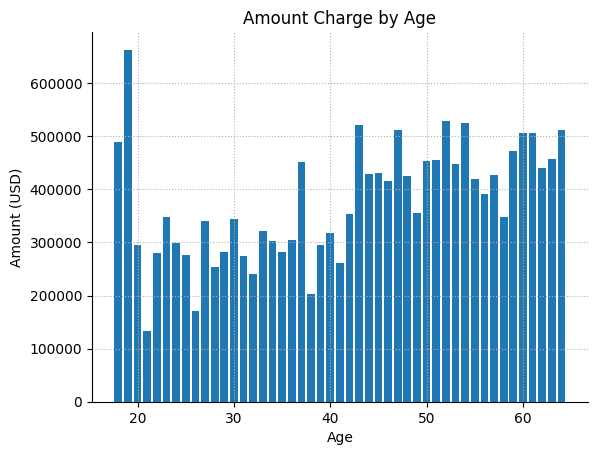

In [11]:
fig, ax = plt.subplots()

serie = insurance.groupby('age').agg({"charges":'sum'}).sort_index()
serie.head()

ax.bar(
    serie.index,
    serie['charges'],
    )

ax.set_title('Amount Charge by Age')
ax.set_xlabel('Age')
ax.set_ylabel('Amount (USD)')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.grid(ls=':')

<Axes: xlabel='bmi', ylabel='Count'>

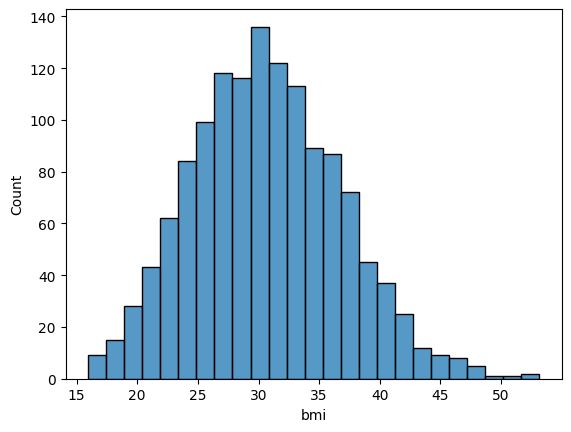

In [12]:
sns.histplot(x=insurance['bmi'])

<Axes: ylabel='smoker'>

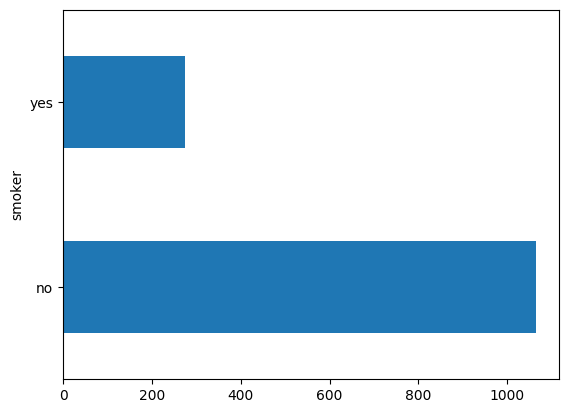

In [13]:
insurance['smoker'].value_counts().plot.barh()

<Axes: ylabel='sex'>

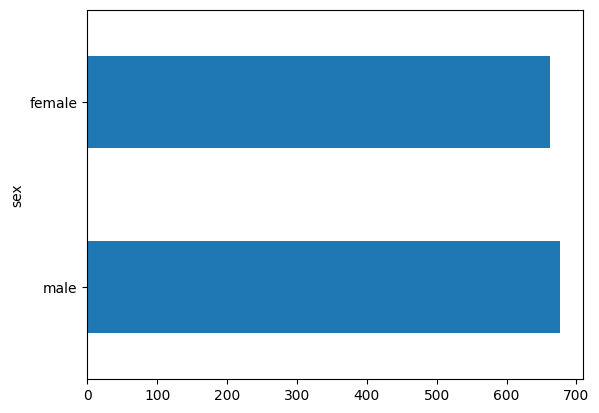

In [17]:
insurance['sex'].value_counts().plot.barh()

In [18]:
insurance[['charges','age']].corr()

,charges,age
charges,1.000000,0.299008
age,0.299008,1.000000


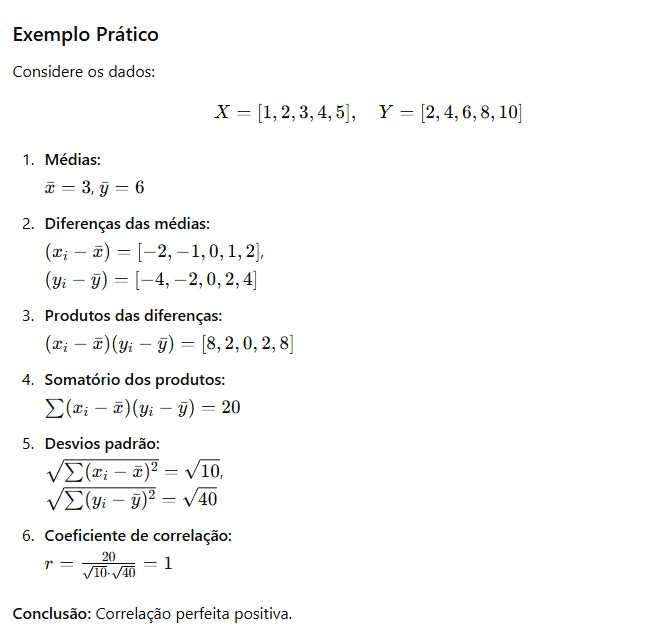

<Axes: >

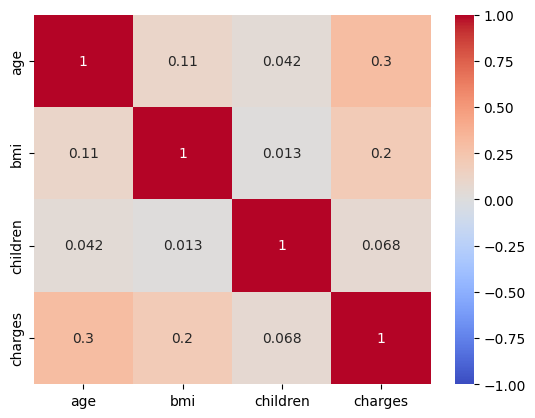

In [21]:
sns.heatmap(insurance.corr(numeric_only=True), annot=True, vmax=1, vmin=-1, cmap='coolwarm')

<Axes: xlabel='age', ylabel='charges'>

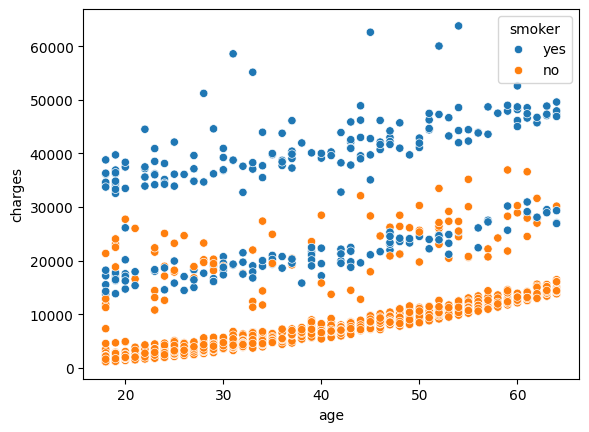

In [23]:
sns.scatterplot(insurance, x='age', y='charges', hue='smoker')

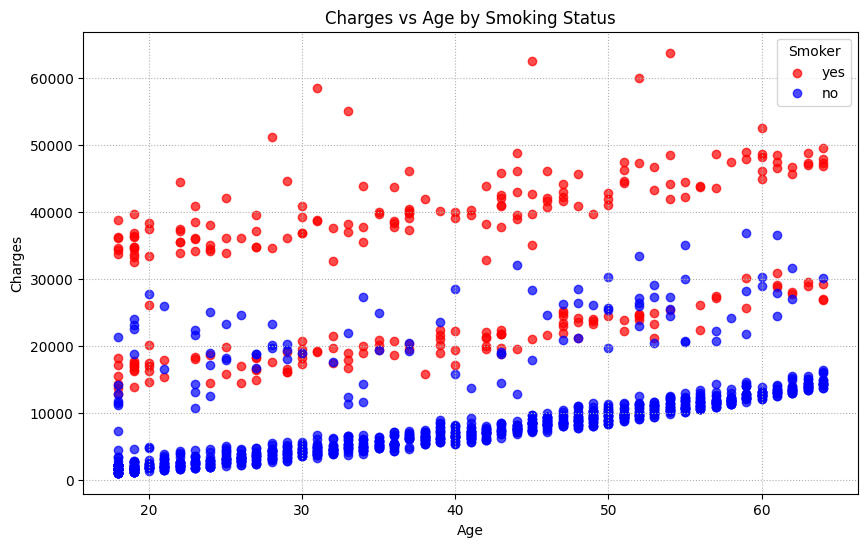

In [25]:
# Criar cores para os grupos de fumantes
colors = {'yes': 'red', 'no': 'blue'}
insurance['color'] = insurance['smoker'].map(colors)

# Criar gráfico de dispersão
plt.figure(figsize=(10, 6))
for smoker_status, color in colors.items():
    filtered_data = insurance[insurance['smoker'] == smoker_status]
    plt.scatter(filtered_data['age'], filtered_data['charges'], c=color, label=smoker_status, alpha=0.7)

# Configurar o gráfico
plt.title("Charges vs Age by Smoking Status")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.legend(title="Smoker")
plt.grid(ls=':')

# Mostrar o gráfico
plt.show()

<Axes: ylabel='smoker'>

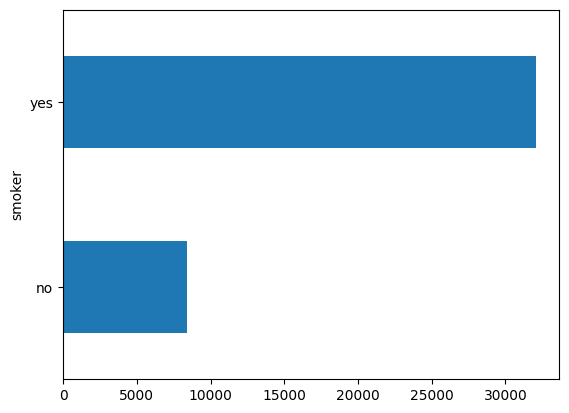

In [27]:
insurance.groupby('smoker')['charges'].mean().plot.barh()

In [33]:
insurance = pd.read_csv('Course Materials/Data/insurance.csv')

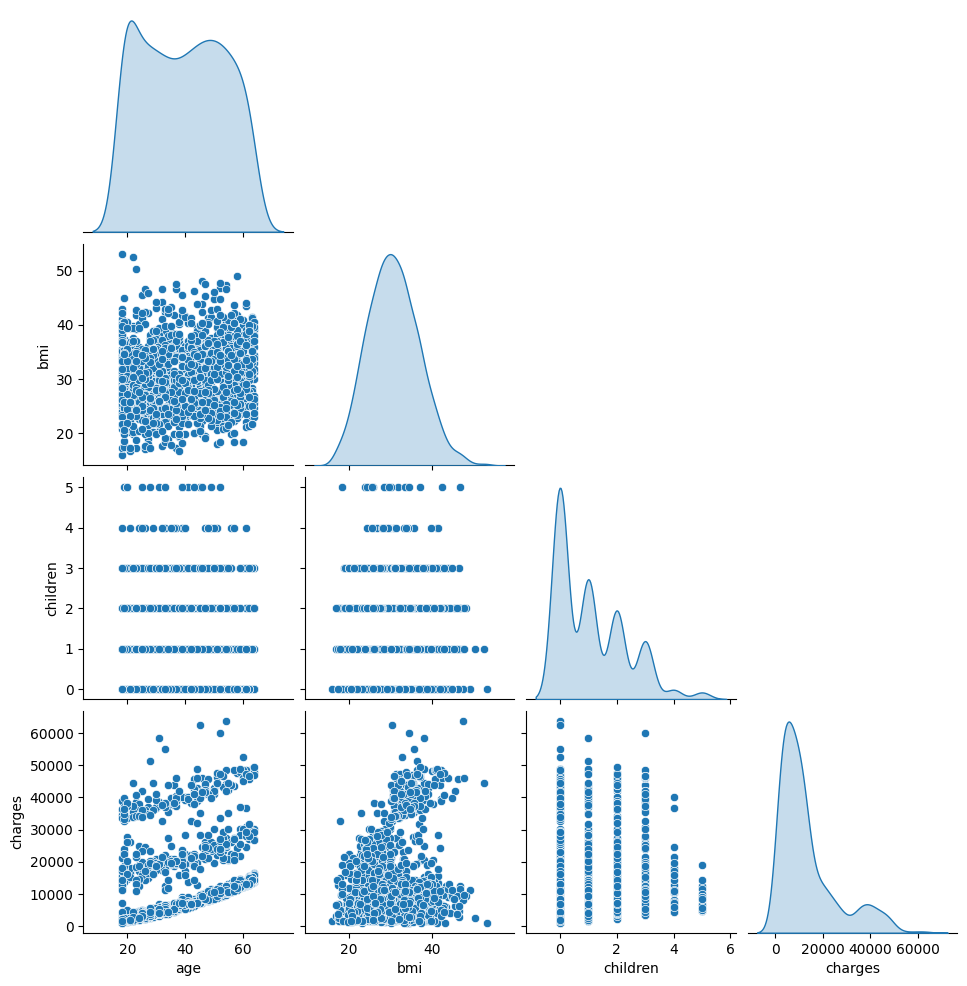

In [37]:
sns.pairplot(insurance, corner=True, diag_kind='kde')

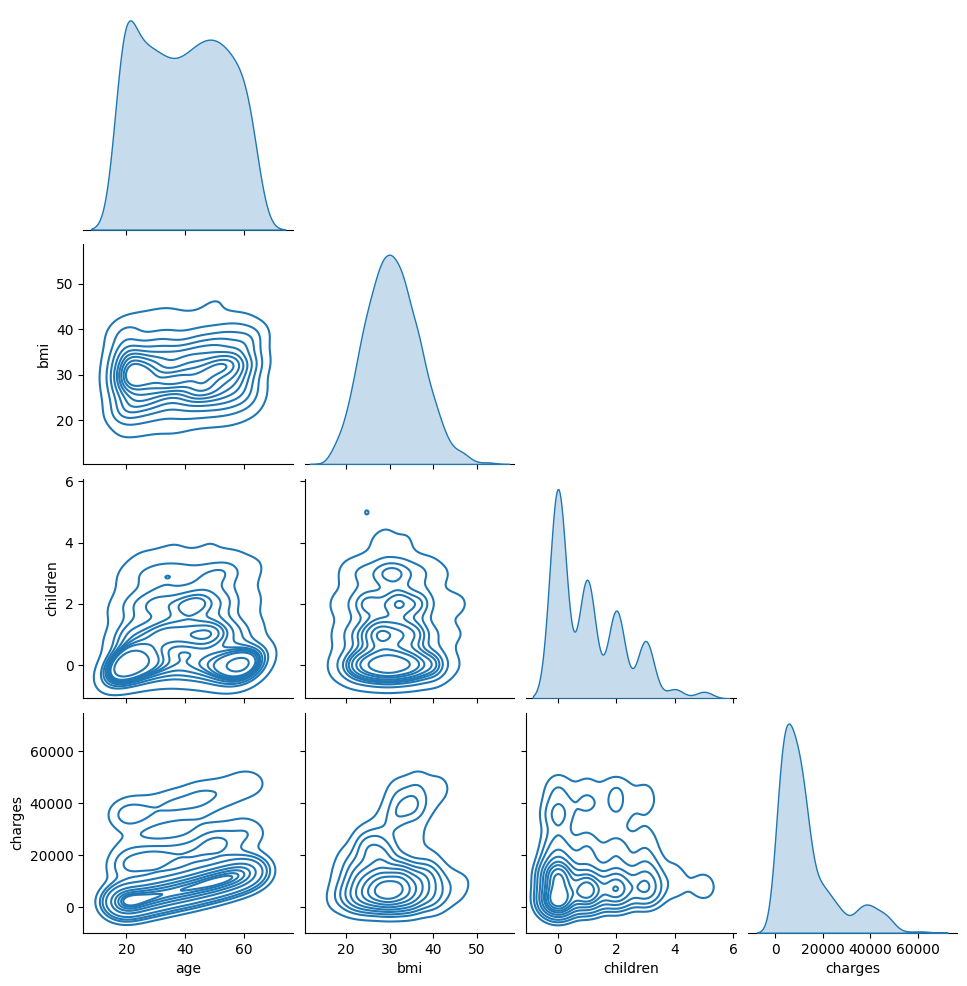

In [39]:
sns.pairplot(insurance, corner=True, kind='kde')

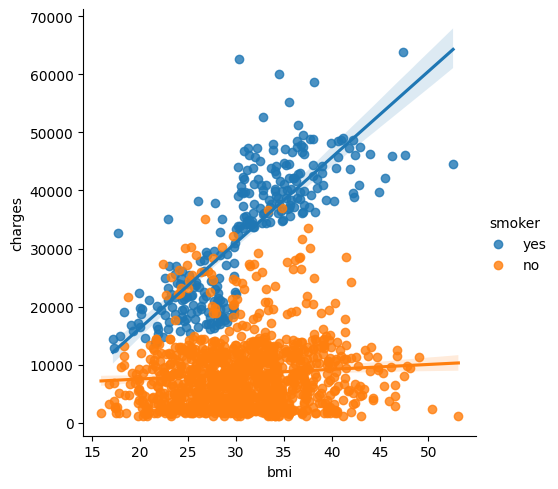

In [41]:
sns.lmplot(insurance, x='bmi', y='charges', hue='smoker')